GOOGLE PLAY APP数据分析

In [ ]:
目录：
一、分析背景与目的
二、技术、工具及数据来源
三、图表分析
四、结论分析和建议

一、分析背景与目的

背景：Google商城的app不同类别不同安装大小和适配手机版本评分不同，下载量也有很大差异。

目的：通过分析数据分布和数据之间的关系得到有关app的一些信息，并且得出结论符合哪些条件的app较受欢迎


包括了：


1.各类别app占比情况

2.用户评分分布情况

3.各类别app用户评分分布情况

4.评分变化和时间趋势

5.免/付费app数量变化趋势

6.免/付费最受欢迎app类别

7.App数量 免费与付费的对比

8.Android版本数量分布和随时间变化

9.各版本免/付费app的装机量



二、技术、工具及数据来源：

本次数据分析主要用的是python，其中数据清洗使用的是pandas和numpy库，

并使用matplotlib和seaborn进行数据可视化，使用到的图表类型有饼图、柱状图、密度分布图、箱型图、散点图、小提琴图

数据来源

https://www.kaggle.com/lava18/google-play-store-apps

三、图表分析

3.1数据清洗

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

In [3]:
data = pd.read_csv(r'D:\google-play-store-apps\googleplaystore.csv')

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#数据处理

In [6]:
dt = data.copy()

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [8]:
#因为app名称各不相同，去除该列

In [9]:
dt.drop('App',axis=1,inplace=True)

In [10]:
#把日期中的年份提取出来

In [11]:
#  dt['Last Updated'].map(lambda x:x.split(',')[1])     这里报错，提示IndexError: list index out of range

In [12]:
#出错，可能是有的日期格式不对，查看是哪个

In [13]:
q = []
for i in range(10841):
    try:
        dt['Last Updated'][i].split(',')[1]
    except IndexError:
        print(i)

10472


In [14]:
#确定了 这一行出现问题，看一下这行数据是什么

In [15]:
dt.iloc[10472]

Category                        1.9
Rating                           19
Reviews                        3.0M
Size                         1,000+
Installs                       Free
Type                              0
Price                      Everyone
Content Rating                  NaN
Genres            February 11, 2018
Last Updated                 1.0.19
Current Ver              4.0 and up
Android Ver                     NaN
Name: 10472, dtype: object

In [16]:
#原来这行数据错位了，调整一下

In [17]:
dt.iloc[10472] = ['NaN',1.9,19,'3.0M','1,000+','Free',0,'Everyone','NaN','February 11, 2018','1.0.19','4.0 and up']

In [18]:
dt.iloc[10472]

Category                        NaN
Rating                          1.9
Reviews                          19
Size                           3.0M
Installs                     1,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                          NaN
Last Updated      February 11, 2018
Current Ver                  1.0.19
Android Ver              4.0 and up
Name: 10472, dtype: object

In [19]:
#再次进行年份的提取

In [20]:
dt['year'] = dt['Last Updated'].map(lambda x:x.split(',')[1])

In [21]:
#这次没有报错

In [22]:
#把Android版本号和手机版本号保留到前面几位

In [23]:
dt['phone_ver']=dt['Android Ver'].map(lambda x: str(x)[:3])

In [24]:
dt['game_ver']=dt['Current Ver'].map(lambda x: str(x)[:3])

In [25]:
#价格保留数字

In [26]:
dt['price_num']=dt['Price'].str.strip('$')

In [27]:
dt['price_num']=dt['price_num'].map(lambda x:float(x))

In [28]:
#把installs转化为数字

In [29]:
a=dt.Installs.str.strip('+').str.replace(',','')
dt['Install_num']=a.map(lambda x: int(x))

In [30]:
#size也转化成数字类型

In [31]:
def f(x):
    if 'k' in x:
        x=x.strip('k')
        x=float(x)/1024
    elif 'M' in x:
        x=x.strip('M')
        x=float(x)
    return x

In [32]:
dt['size_of_app']=dt.Size.map(f)

In [33]:
dt['size_of_app']=dt['size_of_app'].map(lambda x: str(x)[:4] )

In [34]:
dt=dt.rename({'size_of_app':'size_of_app(by_M)'},axis=1)

In [35]:
dt.drop(['Size','Installs','Last Updated','Current Ver','Android Ver','Price'],axis=1,inplace=True)

In [36]:
dt

,Category,Rating,Reviews,Type,Content Rating,Genres,year,phone_ver,game_ver,price_num,Install_num,size_of_app(by_M)
0,ART_AND_DESIGN,4.1,159,Free,Everyone,Art & Design,2018,4.0,1.0,0.0,10000,19.0
1,ART_AND_DESIGN,3.9,967,Free,Everyone,Art & Design;Pretend Play,2018,4.0,2.0,0.0,500000,14.0
2,ART_AND_DESIGN,4.7,87510,Free,Everyone,Art & Design,2018,4.0,1.2,0.0,5000000,8.7
3,ART_AND_DESIGN,4.5,215644,Free,Teen,Art & Design,2018,4.2,Var,0.0,50000000,25.0
4,ART_AND_DESIGN,4.3,967,Free,Everyone,Art & Design;Creativity,2018,4.4,1.1,0.0,100000,2.8
5,ART_AND_DESIGN,4.4,167,Free,Everyone,Art & Design,2017,2.3,1.0,0.0,50000,5.6
6,ART_AND_DESIGN,3.8,178,Free,Everyone,Art & Design,2018,4.0,1.1,0.0,50000,19.0
7,ART_AND_DESIGN,4.1,36815,Free,Everyone,Art & Design,2018,4.2,6.1,0.0,1000000,29.0
8,ART_AND_DESIGN,4.4,13791,Free,Everyone,Art & Design,2017,3.0,2.9,0.0,1000000,33.0
9,ART_AND_DESIGN,4.7,121,Free,Everyone,Art & Design;Creativity,2018,4.0,2.8,0.0,10000,3.1


In [37]:
before = ['Category','Rating','Reviews','Type','Content Rating','Genres','year','phone_ver','game_ver','price_num','Install_num','size_of_app(by_M)']

In [38]:
after = ['类别','评分','评论','收费情况','对象','体裁','年份','手机版本','游戏版本','价格','安装量','应用大小']

In [39]:
trans = zip(before,after)

In [40]:
trans_dict = dict(trans)

In [41]:
trans_dict

{'Category': '类别',
 'Rating': '评分',
 'Reviews': '评论',
 'Type': '收费情况',
 'Content Rating': '对象',
 'Genres': '体裁',
 'year': '年份',
 'phone_ver': '手机版本',
 'game_ver': '游戏版本',
 'price_num': '价格',
 'Install_num': '安装量',
 'size_of_app(by_M)': '应用大小'}

In [42]:
dt.rename(trans_dict,axis=1,inplace=True)

In [43]:
dt.info()
#评分缺失较多，把其他缺失少的数据类型转化一下

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
类别      10841 non-null object
评分      9367 non-null float64
评论      10841 non-null object
收费情况    10840 non-null object
对象      10841 non-null object
体裁      10841 non-null object
年份      10841 non-null object
手机版本    10841 non-null object
游戏版本    10841 non-null object
价格      10840 non-null float64
安装量     10841 non-null int64
应用大小    10841 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 635.3+ KB


In [44]:
dt.head(3)

,类别,评分,评论,收费情况,对象,体裁,年份,手机版本,游戏版本,价格,安装量,应用大小
0,ART_AND_DESIGN,4.1,159,Free,Everyone,Art & Design,2018,4.0,1.0,0.0,10000,19.0
1,ART_AND_DESIGN,3.9,967,Free,Everyone,Art & Design;Pretend Play,2018,4.0,2.0,0.0,500000,14.0
2,ART_AND_DESIGN,4.7,87510,Free,Everyone,Art & Design,2018,4.0,1.2,0.0,5000000,8.7


In [45]:
dt.评分 = dt.评分.map(lambda x:float(x))
dt.评论 = dt.评论.map(lambda x:float(x))
dt.年份 = dt.年份.map(lambda x:int(x))

In [46]:
dt.手机版本.unique()   

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', 'Var', '2.2', '5.0',
       '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3', '2.0', '3.2',
       '7.1', '8.0', '3.1', 'nan', '1.0'], dtype=object)

In [47]:
dt.游戏版本.unique()   

array(['1.0', '2.0', '1.2', 'Var', '1.1', '6.1', '2.9', '2.8', '3.8',
       'nan', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7', '1.6',
       '2.1', '1.3', '1', '1.4', '11.', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '10.', '3.2', '4.6', '5.4', '8.0',
       '3.3', '18.', '9.1', '15.', '5.0', '9.0', '14.', '7.0', '3.9',
       '3.4', '9.7', '4.9', '5.2', '3.5', '7.3', '5.1', '4.1', '99.',
       '12.', '0.9', '6.4', '3.7', '2.6', '4.3', '6.3', '4.7', '4.2',
       '1.8', '37.', '9.8', '24.', '47.', 'R6.', '69.', '7.5', '9.9',
       '42.', '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '196',
       '8.1', '201', '6.6', '4.8', '8.7', '0.0', '3.6', '5.3', '8.2',
       '1.', '2', '20.', '10', '5.7', '13.', '8.5', 'v1.', '01.', '43',
       '16.', '8.4', 'Can', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1',
       '7.9', 'p5.', '112', '37', '8.8', 'Pub', '7.4', '9.6', '220',
       '858', 'v3.', 'Ver', '02.', '9.4', '319', '542', '0.7', '0.5',
       '19.', 

In [48]:
#发现有异常值，标记为负数，其他数值转化成float

In [49]:
def label(x):                       
    try:
        return float(x)
    except ValueError:
        return -1

In [50]:
dt.手机版本 = dt.手机版本.map(label)
dt.游戏版本 = dt.游戏版本.map(label)
dt.应用大小 = dt.应用大小.map(label)

In [51]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
类别      10841 non-null object
评分      9367 non-null float64
评论      10841 non-null float64
收费情况    10840 non-null object
对象      10841 non-null object
体裁      10841 non-null object
年份      10841 non-null int64
手机版本    10839 non-null float64
游戏版本    10833 non-null float64
价格      10840 non-null float64
安装量     10841 non-null int64
应用大小    10841 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 847.0+ KB


In [52]:
dt.收费情况.unique()

array(['Free', 'Paid', nan], dtype=object)

In [53]:
#收费情况，有一行没有，由于只有一行，我们把它填充为免费

In [54]:
dt.收费情况.fillna('Free',inplace=True)

In [55]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
类别      10841 non-null object
评分      9367 non-null float64
评论      10841 non-null float64
收费情况    10841 non-null object
对象      10841 non-null object
体裁      10841 non-null object
年份      10841 non-null int64
手机版本    10839 non-null float64
游戏版本    10833 non-null float64
价格      10840 non-null float64
安装量     10841 non-null int64
应用大小    10841 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 847.0+ KB


3.2把需要的列和行提取出来

In [58]:
dt.head()

,类别,评分,评论,收费情况,对象,体裁,年份,手机版本,游戏版本,价格,安装量,应用大小
0,ART_AND_DESIGN,4.1,159.0,Free,Everyone,Art & Design,2018,4.0,1.0,0.0,10000,19.0
1,ART_AND_DESIGN,3.9,967.0,Free,Everyone,Art & Design;Pretend Play,2018,4.0,2.0,0.0,500000,14.0
2,ART_AND_DESIGN,4.7,87510.0,Free,Everyone,Art & Design,2018,4.0,1.2,0.0,5000000,8.7
3,ART_AND_DESIGN,4.5,215644.0,Free,Teen,Art & Design,2018,4.2,-1.0,0.0,50000000,25.0
4,ART_AND_DESIGN,4.3,967.0,Free,Everyone,Art & Design;Creativity,2018,4.4,1.1,0.0,100000,2.8


In [59]:
dt_select = dt[dt.评分.isnull()==False]
dt_select = dt_select[dt_select.手机版本.isnull()==False]
dt_select = dt_select[dt_select.游戏版本.isnull()==False]
dt_select = dt_select[dt_select.价格.isnull()==False]

3.3先考察一下各个属性之间的相关性

In [60]:
dt_select_cor = dt_select[dt_select.手机版本!=-1]
dt_select_cor = dt_select[dt_select.游戏版本!=-1]

In [61]:
dt_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 12 columns):
类别      9360 non-null object
评分      9360 non-null float64
评论      9360 non-null float64
收费情况    9360 non-null object
对象      9360 non-null object
体裁      9360 non-null object
年份      9360 non-null int64
手机版本    9360 non-null float64
游戏版本    9360 non-null float64
价格      9360 non-null float64
安装量     9360 non-null int64
应用大小    9360 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 804.4+ KB


In [62]:
#先看一下相关系数

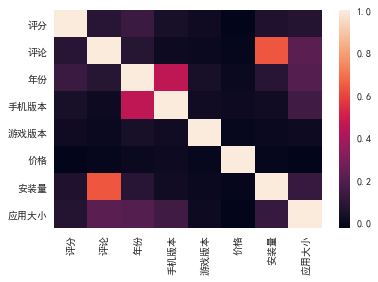

In [63]:
sns.heatmap(dt_select_cor.corr())

可以看审核和安装量的关系、年份和手机版本的相关性很大

应用大小和审核、年份、手机版本也有一定的关系

3.4各类别app占比情况

In [65]:
vv= list(dt_select.类别.value_counts()[:8].values)
vv.append(dt_select.类别.value_counts()[8:].sum())
nn= list(dt_select.类别.value_counts()[:8].index)
nn.append('OTHER')

Text(0.5,1,'Category distribution--pie')

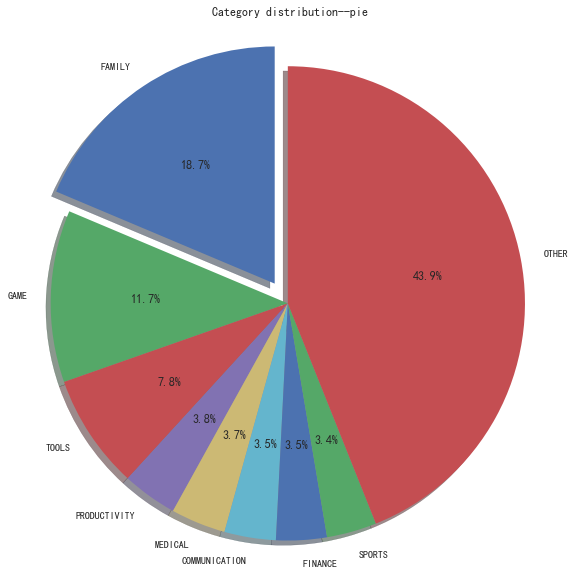

In [66]:
labels = nn
sizes = vv
explode = (0.1, 0, 0, 0, 0, 0, 0,0,0)  

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title(s="Category distribution--pie")

结论1：

Google play 中Familly 类app数量最多，

排名前3的类别 Family，GAME，TOOLS

所有类别的数量情况分布

Text(0,0.5,'Quantity')

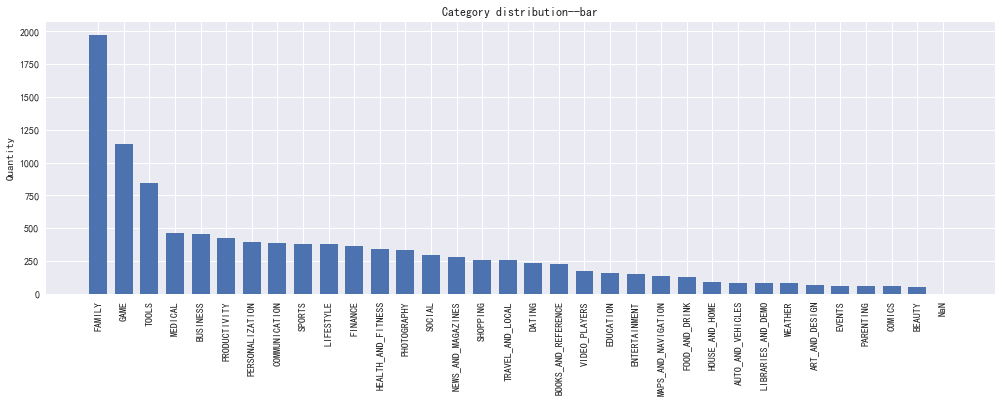

In [67]:
v2 = list(dt.类别.value_counts().values)
n2 = list(dt.类别.value_counts().index)

fig1, ax1 = plt.subplots(figsize=(17,5))
ax1.bar(n2,v2,width=0.7)
plt.xticks(rotation=90)
plt.title(s='Category distribution--bar')
plt.ylabel('Quantity')

3.5用户评分分布情况

In [68]:
dt_score_fill_with_minus_one = dt.评分.fillna(-1)

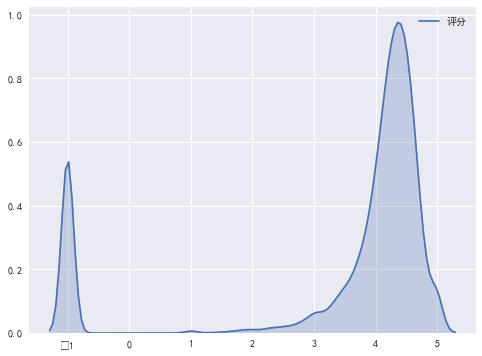

In [69]:
fig, axes = plt.subplots(1,1,figsize=(8,6))
sns.kdeplot(dt_score_fill_with_minus_one, ax = axes, shade=True)

结论2

App评分分布情况，集中分布在4~5之间，  -1表示没有评分，可以看到有相当多一部分没有评分

3.6各类别用户评分分布情况

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

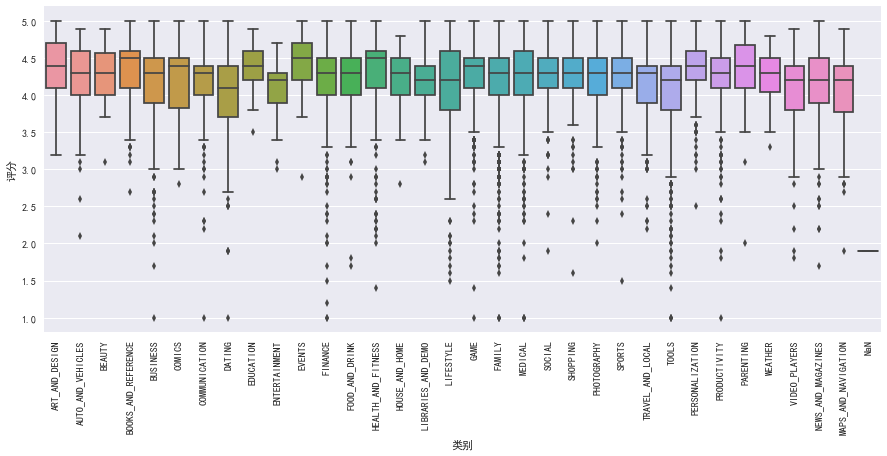

In [70]:
fig, axes = plt.subplots(1,1,figsize=(15,6))
sns.boxplot(x=dt.类别, y=dt.评分, data=dt)
plt.xticks(rotation=90)

结论3

各个类别的评分情况，可以看到LIFESTYLE 、TOOLS类别低分较多

LIFESTYLE断层明显，可能是刷分情况

3.7评分变化和时间趋势

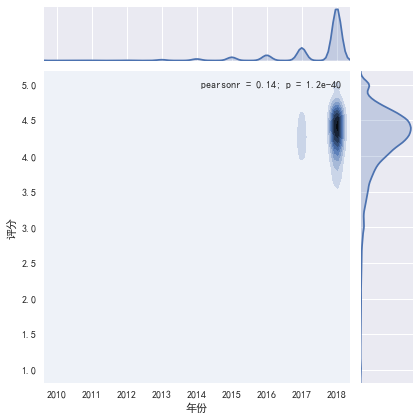

In [71]:
sns.jointplot(dt.年份, dt.评分, kind="kde")

结论4

评分数随时间推移增加，而且2018年评分数大幅度增加，
大部评分分布在4.3分左右

3.8免/付费app数量变化趋势

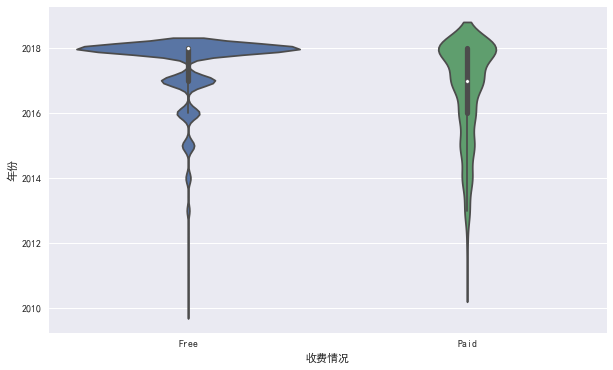

In [72]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
sns.violinplot(dt.收费情况, dt.年份)

结论5

这里得到了很多信息：

2010年前play store上只有免费软件

2010年后开始出现付费形式（可能是刚开始引入付费机制）

2012年前免费和付费app数量相当

2017年前付费app数量多于免费，且数量增长稳定上升

2018年免费app数量突增

3.9免/付费最受欢迎app类别

In [73]:
pop_in_free = dt[dt.收费情况=='Free'].groupby('类别')['安装量'].sum()
pop_in_paid = dt[dt.收费情况=='Paid'].groupby('类别')['安装量'].sum()

pop_in_free = pop_in_free.sort_values(ascending=False)
pop_in_paid = pop_in_paid.sort_values(ascending=False)

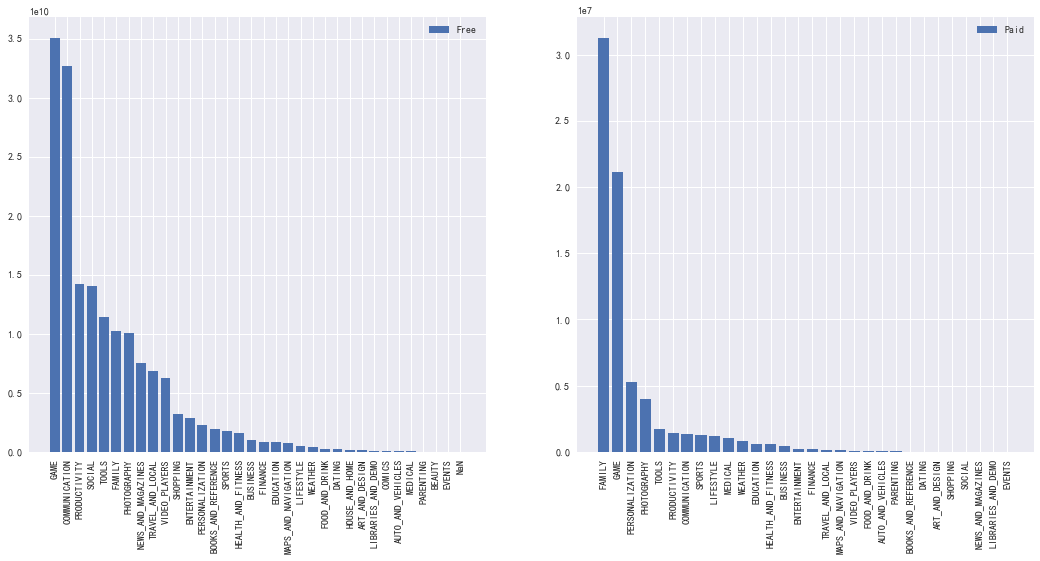

In [74]:
fig, axes = plt.subplots(1,2,figsize=(18,8))


axe1 = plt.subplot(1,2,1)
plt.bar(pop_in_free.index,pop_in_free.values,label='Free')
plt.xticks(rotation=90)

plt.legend()


axe2 = plt.subplot(1,2,2)
plt.bar(pop_in_paid.index,pop_in_paid.values,label='Paid')
plt.xticks(rotation=90)
plt.legend()

结论6

免费应用最受欢迎的top3：GAME、FAMILY、COMMUNICATION

付费应用最受欢迎的top3：GAME、FAMILY、PERSONALIZATION

3.10 App数量 免费与付费的对比

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  del sys.path[0]


Text(0,0.5,'Quantity')

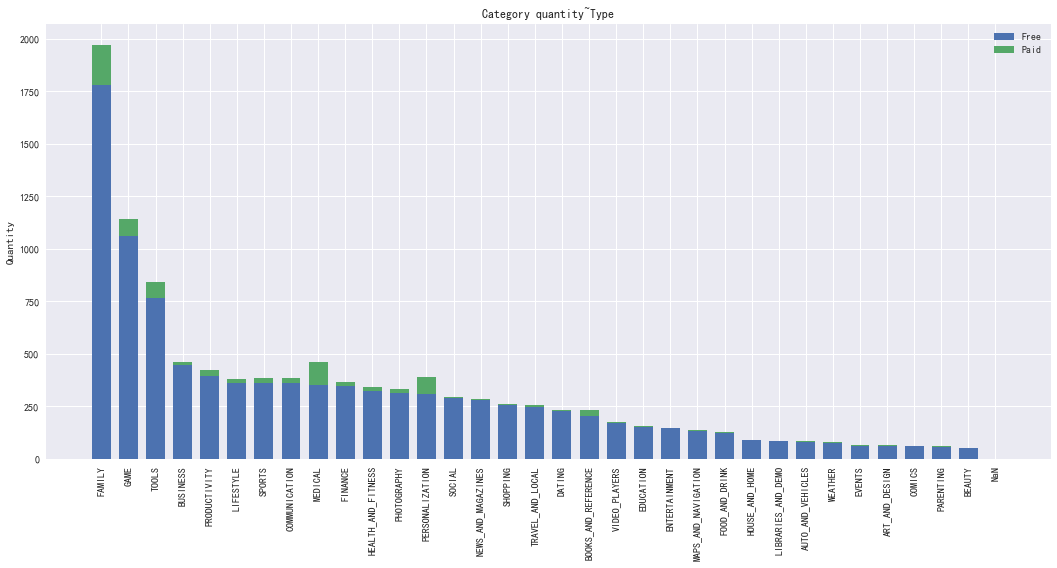

In [75]:
DT_Free = dt[dt.收费情况=='Free']
DT_Paid = dt[dt.收费情况=='Paid']

a=DT_Free.类别.value_counts()
b=DT_Paid.类别.value_counts()

a = pd.DataFrame(a)  #33 rows
b = pd.DataFrame(b)  #30 rows

a.rename({'类别':'Free'},axis=1,inplace=True)
b.rename({'类别':'Paid'},axis=1,inplace=True)

joined = pd.concat([a,b],axis=1)

joined.Free.fillna(0,inplace=True)
joined.Paid.fillna(0,inplace=True)

ind = joined.Free.sort_values(ascending=False)
joined_sorted_by_Free = joined.loc[list(ind.index)]

aH_s=list(joined_sorted_by_Free.Free.values)
bH_s=list(joined_sorted_by_Free.Paid.values)
ax_s=list(joined_sorted_by_Free.index)




fig, axes = plt.subplots(1,1,figsize=(18,8))


axes.bar(ax_s,aH_s,width=0.7,label='Free')
plt.xticks(rotation=90)

axes.bar(ax_s,bH_s,width=0.7,bottom=aH_s,label='Paid')
plt.xticks(rotation=90)

axes.legend()

plt.title(s='Category quantity~Type')
plt.ylabel('Quantity')

结论7

FAMILY类别下app最多；免费app数量大大多于付费app


3.11 Android版本数量分布和随时间变化

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


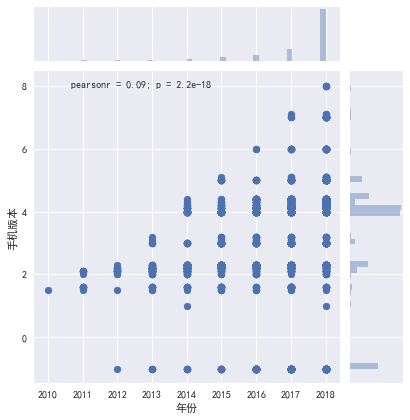

In [90]:
dts_Y_Ph = dt_select.loc[:,['年份','手机版本']]
sns.jointplot("年份", "手机版本", dts_Y_Ph)  

结论8

Android版本、数量随年代而升级

4代版本数量最多

3.12 各版本免/付费app的装机量

Text(0,0.5,'Install')

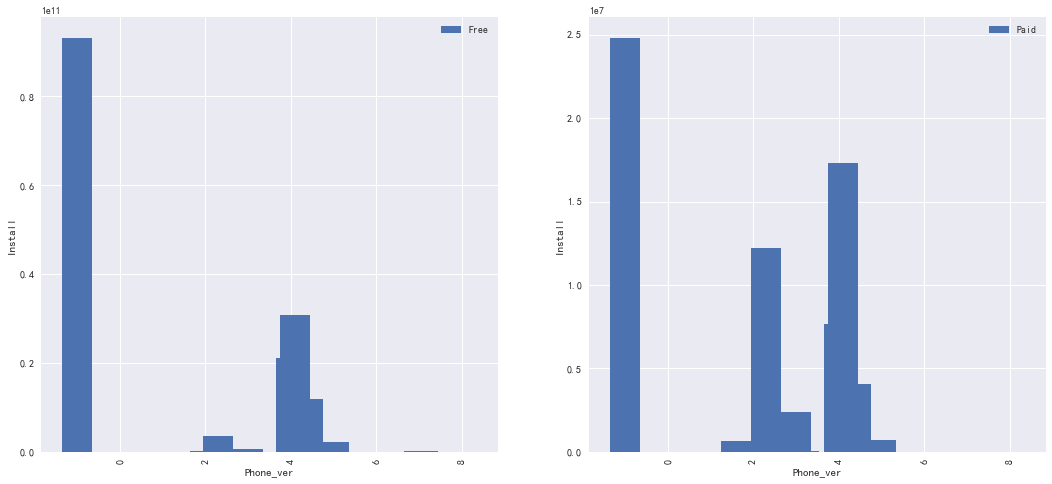

In [77]:
core1=dt_select.groupby(['收费情况','手机版本']).安装量.sum()


xF=core1.xs('Free').index
yF=core1.xs('Free').values
xP=core1.xs('Paid').index
yP=core1.xs('Paid').values

fig, axes = plt.subplots(1,2,figsize=(18,8))

axes1 = plt.subplot(1,2,1)
plt.bar(xF,yF,width=0.7,label='Free')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Phone_ver')
plt.ylabel('Install')

axes2 = plt.subplot(1,2,2,sharex=axes1)   #sharex放的位置   
plt.bar(xP,yP,width=0.7,label='Paid')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Phone_ver')
plt.ylabel('Install')

结论9

Android 4.0 装机量最多

付费app中支持Android 2.0的比例大大高于免费版


四、结论分析和建议

挖掘的信息：

1、app数量最多top3  Family，GAME，TOOLS

2、评分分布在4~5之间

3、LIFESTYLE可能存在刷分情况

4、2010年开始play store开始出现付费app

5、2012年前免费和付费app数量相当

6、2017年前付费app数量多于免费，且数量增长稳定上升

7、2018年免费app数量突增

8、免费最受欢迎类别top3：GAME、FAMILY、COMMUNICATION

9、付费最受欢迎类别top3：GAME、FAMILY、PERSONALIZATION

10、Android 4.0 数量、装机量最多

11、付费app中支持Android 2.0的数量大大多于免费版

分析：

从app的数量分布来看，游戏和家庭类app的数量最多，而分别从免费和付费领域看，也是这两类数量最多，说明这两类应不论免费与否都是很有需求的。

评分分布整体较高，说明大家都乐于给出高分，不存在恶性差评，但同时也反应了评分可信度不高。

分析得出LIFESTYLE类别评分不呈现连续性，可能存在刷分情况。

从时间上看，google store在2010年才出现付费app，说明这个时间点刚开始引入付费app的形式。

和我的预设不同的是，2017年前付费应用竟然是主力，而免费应用后来的追赶之势很迅猛。

大多数应用的平台版本可以兼容4.0，而付费应用中，有很大数量还能兼容2.0。


建议：如果要开发出一款较受欢迎的app，可以选择需求较高的家庭或游戏类应用，要能适配Android系统版本最低4.0。

五、思考与总结

这次的数据分析还有一些可以进一步的挖掘空间。比如app应用名称，可以进行语义的分析，看出现关键词最多的是哪几个，它们和下载量、评分之间又有什么关系。这样对于给出制作出畅销app的建议会更加有帮助。

In [ ]:
作者：黄俊杰